# Recommendation Systems_R5_Project1

# Recommendation system for products on an e-commerce website like Amazon.com.


### Import Python Libraries

In [1]:
import pandas as pd
import numpy as np
import random
import time

import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import pylab as pl

import seaborn as sns
sns.set(style="white")
sns.set(style="darkgrid", color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve

## Problem Statement :
## Build and Evaluate Popularity Recommender model and Collaborative Filtering model for products on an e-commerce website like Amazon.com.

## About the Data:

   __Recommendation system for products on an e-commerce website like Amazon.com__

    Dataset - ​ Amazon Reviews data (http://jmcauley.ucsd.edu/data/amazon/) ratings_Electronics_Ver3.tar.xz
    Dataset columns - first three columns are userId, productId, and ratings and the fourth column is timestamp. You can discard the timestamp column as in this case you may not need to use it.

- The repository has several datasets. For this case study we are using the Electronics dataset.
- The data set consists of:
- 7,824,482 Ratings (1-5) for Electronics products.

### Load Data and read the data as a data frame

In [2]:
data = pd.read_csv("ratings_Electronics.csv", names=['userId', 'productId', 'ratings', 'timestamp'])

### Shape of the data

In [3]:
data.shape

(7824482, 4)

### Data type of each attribute

In [4]:
data.dtypes

userId        object
productId     object
ratings      float64
timestamp      int64
dtype: object

### Check that data is read correctly using head, tail and sample

In [5]:
data.head(5)

,userId,productId,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [6]:
data.tail(5)

,userId,productId,ratings,timestamp
7824477,A2YZI3C9MOHC0L,BT008UKTMW,5.0,1396569600
7824478,A322MDK0M89RHN,BT008UKTMW,5.0,1313366400
7824479,A1MH90R0ADMIK0,BT008UKTMW,4.0,1404172800
7824480,A10M2KEFPEQDHN,BT008UKTMW,4.0,1297555200
7824481,A2G81TMIOIDEQQ,BT008V9J9U,5.0,1312675200


In [7]:
data.sample(5)

,userId,productId,ratings,timestamp
4337532,A25LIC6K9POVTS,B004PAPG32,5.0,1321488000
6790519,A1U3ATUR1FUJIU,B009ZIILLI,1.0,1381276800
3429940,A3DI0HG3PZ1CJ6,B003LR7ME6,4.0,1332460800
3807179,A1EL42564P1HYO,B00428N9OK,4.0,1349740800
3193653,A31I44ESG7UPR,B003B3P2BU,2.0,1280880000


### Info on column name, count of records, not-null/null, datatype, count of datatypes and memory usage of columns

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
userId       object
productId    object
ratings      float64
timestamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


### Null Values

In [9]:
data.isna().sum()

userId       0
productId    0
ratings      0
timestamp    0
dtype: int64

In [10]:
print("\nThere are no Null/Missing values in the dataset\n")


There are no Null/Missing values in the dataset



### Negative values

In [11]:
(data.drop(['userId', 'productId'], axis=1) < 0).sum()

ratings      0
timestamp    0
dtype: int64

In [12]:
print('\nThere are no negative values in ratings and timestamp columns\n')


There are no negative values in ratings and timestamp columns



### Duplicated data

In [13]:
data.duplicated().sum()

0

In [14]:
print("\nThere are no duplicate records in the dataset\n")


There are no duplicate records in the dataset



### Dropping the timestamp column

> We can discard the timestamp column as in this case we may not need to use it.
> Drop the timestamp column

In [15]:
data.drop('timestamp', axis=1, inplace=True)

In [16]:
#check to see that the timestamp column is dropped

data.columns

Index(['userId', 'productId', 'ratings'], dtype='object')

## Exploratory Data Analysis (EDA)

### 5 point summary of numerical attributes

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ratings,7824482.0,4.012337,1.38091,1.0,3.0,5.0,5.0,5.0


### Histogram of the complete dataset

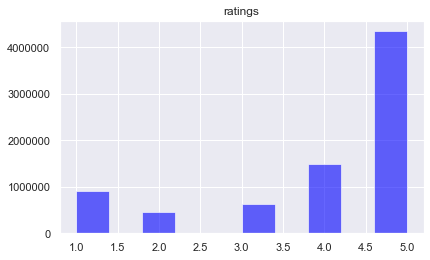

In [18]:
data.hist(bins=10, figsize=(15,9), layout=(2,2),color = 'blue',alpha=0.6)
plt.show()

### Count number of unique users in the dataset

In [19]:
len(data['userId'].unique())

4201696

### Count number of unique products in the dataset

In [20]:
len(data['productId'].unique())

476002

### Ratings given by users and number of unique ratings in the dataset

In [21]:
print("No. of unique ratings in the datset = ",len(data['ratings'].unique()))
print("Ratings given by users to products: ",data['ratings'].unique())

No. of unique ratings in the datset =  5
Ratings given by users to products:  [5. 1. 3. 2. 4.]


### value counts of each rating given by users

In [22]:
data['ratings'].value_counts()

5.0    4347541
4.0    1485781
1.0     901765
3.0     633073
2.0     456322
Name: ratings, dtype: int64

### Countplot showing value counts of each rating

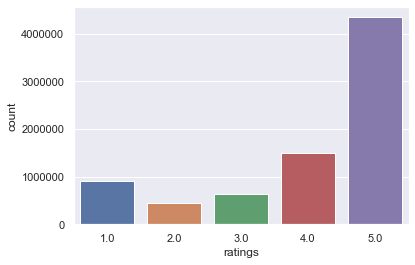

In [23]:
sns.countplot(x='ratings',data=data)
plt.show()

#### <font color=brown>Observations from value counts of ratings :</font>
- <font color=brown>5.0 rating was given the maximum number of times, which is 55.5% in the whole dataset</font>
- <font color=brown>4.0 rating was given the next highest number of times, which is 18.98%</font>
- <font color=brown>The rating 1.0 was given 11.52% number of times and rating 3.0 was given 8.09% number of times</font>
- <font color=brown>Rating 2.0 was given the least number of times which is 5.83%</font>

### Distribution of mean ratings given by users and joint plot of mean ratings given by users and the no of ratings 

In [24]:
data_user_mean = pd.DataFrame(data.groupby(by='userId')['ratings'].mean())
data_user_mean['no_of_ratings'] = data.groupby(by='userId')['ratings'].count()
data_user_mean.head()

,ratings,no_of_ratings
userId,,
A00000262KYZUE4J55XGL,5.0,1
A000063614T1OE0BUSKUT,5.0,2
A00009182QVLSWIGHLS1B,5.0,1
A00009661LC9LQPGKJ24G,5.0,1
A00010809P09NUU6ZP6H,5.0,1


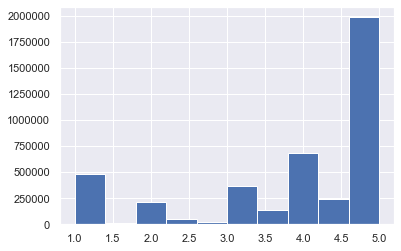

In [25]:
data_user_mean['ratings'].hist(bins=10)
plt.show()

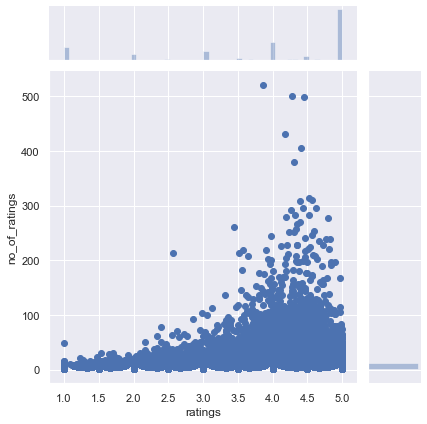

In [26]:
sns.jointplot(x='ratings', y='no_of_ratings', data=data_user_mean)
plt.show()

#### <font color=brown>Observations from histogram and jointplot  :</font>
- <font color=brown>Histogram of mean ratings shows that most of the ratings given by users are between 3.5 and 5.0</font>
- <font color=brown>A jointplot of the mean ratings given by the users and number of ratings given shows that as the rating increases from 1.0 to 5.0 the number of ratings given also increses</font>
- <font color=brown>One user has given maximum number of ratings above 500 and two users have given number of ratings very close to 500</font>
- <font color=brown>Three users have given total ratings between 300 to 400</font>

### Distribution of mean ratings given to products and jointplot of mean ratings given to products and no of ratings 

In [27]:
data_product_mean = pd.DataFrame(data.groupby(by='productId')['ratings'].mean())
data_product_mean['no_of_ratings'] = data.groupby(by='productId')['ratings'].count()
data_product_mean.head()

,ratings,no_of_ratings
productId,,
0132793040,5.000000,1
0321732944,5.000000,1
0439886341,1.666667,3
0511189877,4.500000,6
0528881469,2.851852,27


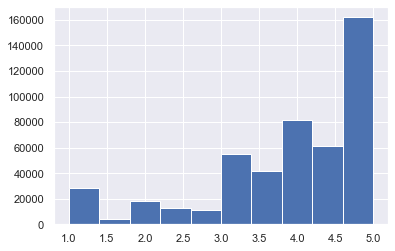

In [28]:
data_product_mean['ratings'].hist(bins=10)
plt.show()

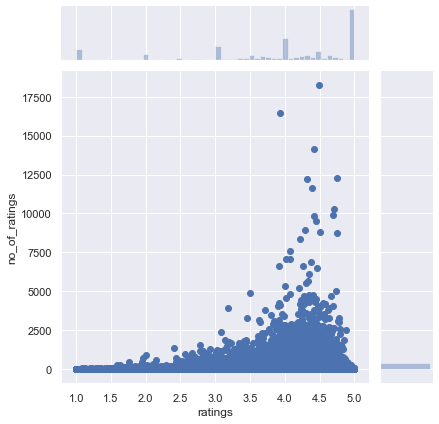

In [29]:
sns.jointplot(x='ratings', y='no_of_ratings', data=data_product_mean)
plt.show()

#### <font color=brown>Observations from histogram and jointplot :</font>
- <font color=brown>Histogram of mean ratings shows that most of the ratings given to products are between 3.5 and 5.0</font>
- <font color=brown>A jointplot of the mean ratings given to products and number of ratings given shows that as the rating increases from 1.0 to 5.0 the number of ratings given also increses</font>
- <font color=brown>One product has been given maximum number of ratings above 17500, one product has been given number of ratings between 15000 and 17500</font>
- <font color=brown>One product has been given number of ratings between 12500 to 15000</font>

### Create a dataset with only the users who has given 50 or more number of ratings

In [30]:
#Count of users who has given 50 or more number of ratings

print("Number of users who have given 50 or more ratings :")
(data.groupby(by='userId')['ratings'].count() >= 50).sum()

Number of users who have given 50 or more ratings :


1540

In [31]:
user_ratings_count = pd.DataFrame(data.groupby(by='userId', as_index=False)['ratings'].count())

In [32]:
user_ratings_count.shape

(4201696, 2)

### Showing the Top 10 users who have given the maximum ratings for the products 

In [33]:
user_ratings_count.sort_values(by='ratings', ascending=False).head(10)

,userId,ratings
3263531,A5JLAU2ARJ0BO,520
3512451,ADLVFFE4VBT8,501
2989526,A3OXHLG6DIBRW8,498
3291008,A6FIAB28IS79,431
3284634,A680RUE1FDO8B,406
755206,A1ODOGXEYECQQ8,380
2424036,A36K2N527TXXJN,314
1451394,A2AY4YUOX2N1BQ,311
4100926,AWPODHOB4GFWL,308
1277963,A25C2M3QF9G7OQ,296


#### <font color=brown>Observation on top 10 users:</font>
- <font color=brown>The userid 'A5JLAU2ARJ0BO' has given a maximum of 520 ratings to the products an dthe user 'ADLVFFE4VBT8' has given 501 ratings to the products</font>

### Create a dataset with only the products which have been rated 50 or more number of times

In [34]:
#Count of products which have been rated 50 or more number of times

print("Number of products which have been rated 50 or more times :")
(data.groupby(by='productId')['ratings'].count() >= 50).sum()

Number of products which have been rated 50 or more times :


26226

In [35]:
product_ratings_count = pd.DataFrame(data.groupby(by='productId', as_index=False)['ratings'].count())

In [36]:
product_ratings_count.shape

(476002, 2)

### Showing the Top 10 products which have been rated the Maximum number of times 

In [37]:
product_ratings_count.sort_values(by='ratings', ascending=False).head(10)

,productId,ratings
308398,B0074BW614,18244
429572,B00DR0PDNE,16454
327308,B007WTAJTO,14172
102804,B0019EHU8G,12285
296625,B006GWO5WK,12226
178601,B003ELYQGG,11617
178813,B003ES5ZUU,10276
323013,B007R5YDYA,9907
289775,B00622AG6S,9823
30276,B0002L5R78,9487


#### <font color=brown>Observation on top 10 products:</font>
- <font color=brown>The product 'B0074BW614'was rated the maximum number of 18244 times by the users. The product 'B00DR0PDNE'was rated 16454 times by users</font>

### Create a subset of the dataset to make it less sparse/more dense.Keep only the users who have given 50 or more ratings to the products and ignore the rest

In [38]:
#We have already created user_ratings_count dataset which has users with the counts of user ratings.

user_ratings_count[(user_ratings_count['ratings']>=50)].shape

(1540, 2)

In [39]:
#Create a DataFrame with users who have given 50 or more ratings

data_df = data[data['userId'].isin(user_ratings_count.loc[(user_ratings_count['ratings']>=50), 'userId'])]

In [40]:
#Reset the index of the new DataFrame

data_df.reset_index(drop=True, inplace=True)

In [41]:
#The shape of the new DataFrame which has 125871 users

data_df.shape

(125871, 3)

In [42]:
data_df.head()

,userId,productId,ratings
0,A3BY5KCNQZXV5U,0594451647,5.0
1,AT09WGFUM934H,0594481813,3.0
2,A32HSNCNPRUMTR,0970407998,1.0
3,A17HMM1M7T9PJ1,0970407998,4.0
4,A3CLWR1UUZT6TG,0972683275,5.0


In [43]:
data_df.tail()

,userId,productId,ratings
125866,A1E1LEVQ9VQNK,B00LGQ6HL8,5.0
125867,A2NYK9KWFMJV4Y,B00LGQ6HL8,5.0
125868,A3AYSYSLHU26U9,B00LI4ZZO8,4.0
125869,A2NYK9KWFMJV4Y,B00LI4ZZO8,5.0
125870,A2BYV7S1QP2YIG,B00LKG1MC8,5.0


In [44]:
data_df['ratings'].value_counts()

5.0    71034
4.0    32295
3.0    12060
2.0     5367
1.0     5115
Name: ratings, dtype: int64

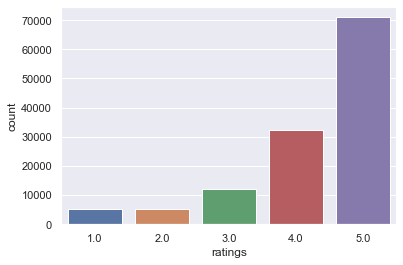

In [45]:
sns.countplot(x='ratings',data=data_df)
plt.show()

## Building a Popularity based Recommender System

### Create a class for Popularity based Recommender System model

In [46]:
#Class for Popularity based Recommender System model

class popularity_recommender_py():
    def __init__(self):
        self.train_data = None
        self.userId = None
        self.productId = None
        self.n_recommendations = None
        self.popularity_recommendations = None
        
    #Create the popularity based recommender system model
    
    def create(self, train_data, userId, productId, n_recommendations):
        self.train_data = train_data
        self.userId = userId
        self.productId = productId
        self.n_recommendations = n_recommendations

        #Get a count of userIds for each unique product as recommendation score
        train_data_grouped = train_data.groupby([self.productId]).agg({self.userId: 'count'}).reset_index()
        train_data_grouped.rename(columns = {'userId': 'score'},inplace=True)
    
        #Sort the products based upon recommendation score
        train_data_sort = train_data_grouped.sort_values(['score', self.productId], ascending = [0,1])
    
        #Generate a recommendation rank based upon score
        train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first')
        
        #Get the top 10 recommendations
        self.popularity_recommendations = train_data_sort.head(n_recommendations)

    #Use the popularity based recommender system model to
    #make recommendations
    
    def recommend(self, userId):    
        user_recommendations = self.popularity_recommendations        
        #print(user_recommendations)
        
        #Add userId column for which the recommendations are being generated
        user_recommendations['userId'] = userId
        #print(user_recommendations['userId'])
        
        #Bring userId column to the front
        cols = user_recommendations.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        #print(user_recommendations[cols])
        
        user_recommendations = user_recommendations[cols]
        return user_recommendations
    

### Create an instance of popularity based recommender class

In [47]:
#Top k Recommendations to be given where k=5
n_recommendations=10

#Create instance of Popularity based Recommender system 
popularity_model = popularity_recommender_py()

### Create a Popularity based Product Recommender

In [48]:
popularity_model.create(data_df, 'userId', 'productId', n_recommendations)

In [49]:
user_id = data_df.loc[2450,'userId']
popularity_model.recommend(user_id)

,userId,productId,score,Rank
39003,A1S7BFT0HDF3HA,B0088CJT4U,206,1.0
24827,A1S7BFT0HDF3HA,B003ES5ZUU,184,2.0
11078,A1S7BFT0HDF3HA,B000N99BBC,167,3.0
38250,A1S7BFT0HDF3HA,B007WTAJTO,164,4.0
38615,A1S7BFT0HDF3HA,B00829TIEK,149,5.0
38611,A1S7BFT0HDF3HA,B00829THK0,137,6.0
39338,A1S7BFT0HDF3HA,B008DWCRQW,137,7.0
21982,A1S7BFT0HDF3HA,B002R5AM7C,128,8.0
28761,A1S7BFT0HDF3HA,B004CLYEDC,118,9.0
22210,A1S7BFT0HDF3HA,B002SZEOLG,113,10.0


In [50]:
user_id = data_df.loc[38,'userId']
popularity_model.recommend(user_id)

,userId,productId,score,Rank
39003,A30X750M8V1XXW,B0088CJT4U,206,1.0
24827,A30X750M8V1XXW,B003ES5ZUU,184,2.0
11078,A30X750M8V1XXW,B000N99BBC,167,3.0
38250,A30X750M8V1XXW,B007WTAJTO,164,4.0
38615,A30X750M8V1XXW,B00829TIEK,149,5.0
38611,A30X750M8V1XXW,B00829THK0,137,6.0
39338,A30X750M8V1XXW,B008DWCRQW,137,7.0
21982,A30X750M8V1XXW,B002R5AM7C,128,8.0
28761,A30X750M8V1XXW,B004CLYEDC,118,9.0
22210,A30X750M8V1XXW,B002SZEOLG,113,10.0


In [51]:
user_id = data_df.loc[15256,'userId']
popularity_model.recommend(user_id)

,userId,productId,score,Rank
39003,A2X3L31KCXBHCL,B0088CJT4U,206,1.0
24827,A2X3L31KCXBHCL,B003ES5ZUU,184,2.0
11078,A2X3L31KCXBHCL,B000N99BBC,167,3.0
38250,A2X3L31KCXBHCL,B007WTAJTO,164,4.0
38615,A2X3L31KCXBHCL,B00829TIEK,149,5.0
38611,A2X3L31KCXBHCL,B00829THK0,137,6.0
39338,A2X3L31KCXBHCL,B008DWCRQW,137,7.0
21982,A2X3L31KCXBHCL,B002R5AM7C,128,8.0
28761,A2X3L31KCXBHCL,B004CLYEDC,118,9.0
22210,A2X3L31KCXBHCL,B002SZEOLG,113,10.0


#### <font color=brown>Observations on Popularity Based Recommender System model:</font>
-  <font color=brown>The Popularity recommender model has recommended the best products based on poularity of the product.</font>
-  <font color=brown>The top 10 recommendations for different user_ids are shown above.</font>
-  <font color=brown>We observe that - Popularity recommender system recommends the same top 10 products for any user irrespective of his personna like products brought and ratings given.</font>
- <font color=brown>Popularity Recommender syatem is not based on user personalizations</font>

### Split the data randomly into train and test dataset in the ratio 70:30 for building a Collaborative Filtering model not based on Surprise library.

In [52]:
train_data, test_data = train_test_split(data_df, test_size = 0.30, random_state=7)
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)
print(train_data.shape, test_data.shape)

(88109, 3) (37762, 3)


In [53]:
print(train_data.head(5))

           userId   productId  ratings
0  A1RJKTYC03L0JY  B001940MFO      5.0
1  A3EZEP0FX5BC1P  B0079TOI8K      4.0
2   ASFP250F22MDZ  B000S5KMSW      5.0
3  A1XXMNLOLKNO0I  B007F9XHBI      5.0
4   AWNBZSEZ9P8BE  B007X3VEX4      4.0


In [54]:
print(test_data.head(5))

           userId   productId  ratings
0   A1RPTVW5VEOSI  B000K5VD2E      1.0
1  A213J54E63SYOP  B00EYVNFMG      4.0
2  A17V9XL4CWTQ6G  B003W5QCTI      4.0
3  A3V7D0LH8L7BG0  B002MAPS6W      4.0
4   ATNOI7E8GTIVE  B0015A8Y3E      5.0


## Building a Collaborative Filtering based Recommendation System without using Surprise library of scikit
## Creating an Item Similarity Based Collaborative Recommendation System

### Class for an item similarity based personalized recommender system

In [55]:
#Class for Item similarity based Recommender System model
class item_similarity_recommender_py():
    def __init__(self):
        self.train_data = None
        self.user_id = None
        self.item_id = None
        self.cooccurence_matrix = None
        #self.songs_dict = None
        #self.rev_songs_dict = None
        self.item_similarity_recommendations = None
    
    #Get unique items (products) corresponding to a given user
    def get_user_items(self, user):
        user_data = self.train_data[self.train_data[self.user_id] == user]
        user_items = list(user_data[self.item_id].unique())
        return user_items
    
    #Get unique users for a given item (product)
    def get_item_users(self, item):
        item_data = self.train_data[self.train_data[self.item_id] == item]
        item_users = set(item_data[self.user_id].unique())
        return item_users
    
    #Get unique items (products) in the training data
    def get_all_items_train_data(self):
        all_items = list(self.train_data[self.item_id].unique())
        return all_items
    
    #Construct cooccurence matrix
    def construct_cooccurence_matrix(self, user_products, all_products):
        
        #Get users for all products in user_products.
        user_products_users = []        
        for i in range(0, len(user_products)):
            user_products_users.append(self.get_item_users(user_products[i]))
            
        #Initialize the item cooccurence matrix of size 
        #len(user_products) X len(products)
        
        cooccurence_matrix = np.matrix(np.zeros(shape=(len(user_products), len(all_products))), float)

        #Calculate similarity between user products and all unique products in the training data
        for i in range(0,len(all_products)):
            #Calculate unique users of a product (item) i
            products_i_data = self.train_data[self.train_data[self.item_id] == all_products[i]]
            users_i = set(products_i_data[self.user_id].unique())
            
            for j in range(0,len(user_products)):                           
                #Get unique users of a product (item) j
                users_j = user_products_users[j]  
                
                #Calculate intersection of users of products i and j
                users_intersection = users_i.intersection(users_j)  
                
                #Calculate cooccurence_matrix[i,j] as Jaccard Index
                if len(users_intersection) != 0:
                    #Calculate union of users of products i and j
                    users_union = users_i.union(users_j)                    
                    cooccurence_matrix[j,i] = float(len(users_intersection))/float(len(users_union))
                else:
                    cooccurence_matrix[j,i] = 0       
        return cooccurence_matrix
    
    #Use the cooccurence matrix to make top recommendations
    def generate_top_recommendations(self, user, cooccurence_matrix, all_products, user_products):
        print("Non zero values in cooccurence_matrix :%d" % np.count_nonzero(cooccurence_matrix))
        
        #Calculate a weighted average of the scores in cooccurence matrix for all user products.
        user_sim_scores = cooccurence_matrix.sum(axis=0)/float(cooccurence_matrix.shape[0])
        user_sim_scores = np.array(user_sim_scores)[0].tolist()
 
        #Sort the indices of user_sim_scores based upon their value
        #Also maintain the corresponding score
        sort_index = sorted(((e,i) for i,e in enumerate(list(user_sim_scores))), reverse=True)
    
        #Create a dataframe from the following
        columns = ['userId', 'productId', 'score', 'rank']
        #index = np.arange(1) # array of numbers for the number of samples
        df = pd.DataFrame(columns=columns)
         
        #Fill the dataframe with top 10 item based recommendations
        rank = 1 
        for i in range(0,len(sort_index)):
            if ~np.isnan(sort_index[i][0]) and all_products[sort_index[i][1]] not in user_products and rank <= 10:
                df.loc[len(df)]=[user,all_products[sort_index[i][1]],sort_index[i][0],rank]
                rank = rank+1
        
        #Handle the case where there are no recommendations
        if df.shape[0] == 0:
            print("The current user has no products for training the item similarity based recommendation model.")
            return -1
        else:
            return df
    
    #Create the item similarity based recommender system model
    def create(self, train_data, user_id, item_id):
        self.train_data = train_data
        self.user_id = user_id
        self.item_id = item_id
        
    #Use the item similarity based recommender system model to make recommendations
    def recommend(self, user):
        
        #A. Get all unique products for this user
        user_products = self.get_user_items(user)                
        print("No. of unique products for the user: %d" % len(user_products))
        
        #B. Get all unique items (products) in the training data
        all_products = self.get_all_items_train_data()        
        print("No. of unique products in the training set: %d" % len(all_products))
         
        #C. Construct item cooccurence matrix of size 
        #len(user_products) X len(products)
        
        cooccurence_matrix = self.construct_cooccurence_matrix(user_products, all_products)
        
        #D. Use the cooccurence matrix to make recommendations
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_products, user_products)                
        return df_recommendations
    
    #Get similar items to given items
    def get_similar_items(self, item_list):
        
        user_products = item_list

        #A. Get all unique items (products) in the training data
        all_products = self.get_all_items_train_data()  
        print("No. of unique products in the training set: %d" % len(all_products))
         
        #B. Construct item cooccurence matrix of size 
        #len(user_products) X len(products)
        
        cooccurence_matrix = self.construct_cooccurence_matrix(user_products, all_products)
        
        #C. Use the cooccurence matrix to make recommendations
        user = ""
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_products, user_products)         
        return df_recommendations


### Create an instance of item similarity based recommender class

In [56]:
is_model = item_similarity_recommender_py()
is_model.create(train_data, 'userId', 'productId')

### Use the personalized Item Similarity model to make some product recommendations to users in training dataset

In [57]:
#Print the products for the user in training data
user_id = train_data.loc[5, 'userId']
user_items = is_model.get_user_items(user_id)
#
print("------------------------------------------------------------------------------------")
print("Training data products for the user with userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

#for user_item in user_items:
    #print(user_item)
print(user_items)
    
print("----------------------------------------------------------------------")
print("Recommendation process is going on:")
print("----------------------------------------------------------------------")

#Recommend products for the user using personalized model
is_model.recommend(user_id)

------------------------------------------------------------------------------------
Training data products for the user with userid: A213J54E63SYOP:
------------------------------------------------------------------------------------
['B00B2AT8DW', 'B001JQJ8N4', 'B009049PUI', 'B000OCRLRY', 'B00GSAVAUU', 'B0088PUEPK', 'B000QYKVKO', 'B0042A2V88', 'B0035B4LJM', 'B003QUNYQI', 'B003Y5QKJI', 'B003L1AI8O', 'B0002J2P2A', 'B00B5HE3UU', 'B005JRGOCM', 'B001OQQ01W', 'B008ZGKWQI', 'B00DHC6BVK', 'B007JPOX8O', 'B008OV6PWY', 'B006Z7TA1W', 'B008GTAPSO', 'B00011KLSO', 'B00EZ4DWOS', 'B000OK22AW', 'B000HGMM9Y', 'B0013V58WK', 'B00AO9MPAK', 'B0068LACFI', 'B008MLILWI', 'B00D3MJ152', 'B007HJ5R32', 'B0049GEFU2', 'B002OJN250', 'B001VEAI74', 'B003OUWACO', 'B0067S8IZ8', 'B008CXTX7S', 'B005QWY3PU', 'B0058GN1AM', 'B003OUWACE', 'B003NR57BY', 'B0050H9A18', 'B000FBK3QK', 'B00EZJY15M', 'B001KU44HE', 'B002OEBTCS', 'B003SX0RMM', 'B00H305DCK', 'B004HRCUEQ', 'B00BJGF5OA', 'B000083KIH', 'B004NJD97A', 'B0033SH9WI', 'B000COZ

,userId,productId,score,rank
0,A213J54E63SYOP,B0018COZDC,0.008772,1
1,A213J54E63SYOP,B00E0SJCX4,0.008772,2
2,A213J54E63SYOP,B001FRXL0S,0.008772,3
3,A213J54E63SYOP,B00CY9Q8AQ,0.008772,4
4,A213J54E63SYOP,B006LWQU96,0.008772,5
5,A213J54E63SYOP,B004VU1KUY,0.008772,6
6,A213J54E63SYOP,B001GN5OLK,0.008772,7
7,A213J54E63SYOP,B004TJI98I,0.008772,8
8,A213J54E63SYOP,B009K6GQEY,0.008772,9
9,A213J54E63SYOP,B001J1PUOK,0.008772,10


### Use the personalized Item Similarity model to make some product recommendations to users in test dataset

In [59]:
#Print the products for the user in test data
user_id = test_data.loc[5, 'userId']
user_items = is_model.get_user_items(user_id)
#
print("------------------------------------------------------------------------------------")
print("Test data products for the user with userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

#for user_item in user_items:
    #print(user_item)
print(user_items)
    
print("----------------------------------------------------------------------")
print("Recommendation process is going on:")
print("----------------------------------------------------------------------")

#Recommend products for the user using personalized model
is_model.recommend(user_id)

------------------------------------------------------------------------------------
Test data products for the user with userid: A3VL4RXCWNSR3H:
------------------------------------------------------------------------------------
['B0000ALPBA', 'B00006IJOR', 'B004EBUXHQ', 'B0001ILY92', 'B002VWJVD2', 'B0035APGP6', 'B0039WFVLY', 'B0001FV3C8', 'B00080YK9Y', 'B00A81SXHI', 'B00CE58ZYC', 'B000N1N1VG', 'B000646MZW', 'B000KB96QS', 'B00029XBKK', 'B006G5F2CY', 'B000E6NGBU', 'B0035B1BBI', 'B00009KIYM', 'B0072C8DE4', 'B0000AZW8L', 'B009FD4UDG', 'B003TDIEXU', 'B0050SPZMK', 'B002RWKFFE', 'B0001OYZTC', 'B002DYIYRW', 'B001KMXIKG', 'B0022BFIOS', 'B0000DCK7I', 'B000GZ09YQ', 'B00076SBT4', 'B000CE9TU6', 'B001CLMY50', 'B001KX8VES', 'B000092YOU', 'B000OV818I', 'B00009UI2Z', 'B001JYRZ54', 'B00007IFED', 'B000HZXX1G', 'B0015F5HIY', 'B000C0V5RA', 'B00006BB8G', 'B0009SIQDQ']
----------------------------------------------------------------------
Recommendation process is going on:
-------------------------------

,userId,productId,score,rank
0,A3VL4RXCWNSR3H,B00GUXZE6Q,0.011111,1
1,A3VL4RXCWNSR3H,B005PBJF6O,0.011111,2
2,A3VL4RXCWNSR3H,B0001MKTZS,0.011111,3
3,A3VL4RXCWNSR3H,B00H4DOFE8,0.011111,4
4,A3VL4RXCWNSR3H,B005L90Q0O,0.011111,5
5,A3VL4RXCWNSR3H,B005EMQFVM,0.011111,6
6,A3VL4RXCWNSR3H,B00HTWF9ZI,0.011111,7
7,A3VL4RXCWNSR3H,B004PKC9XM,0.011111,8
8,A3VL4RXCWNSR3H,B00322IMBC,0.011111,9
9,A3VL4RXCWNSR3H,B0080E1SIQ,0.011111,10


### Find the products which are similar to a product in Training set

In [60]:
product = train_data.loc[1020, 'productId']
print("The Products which are similar to {} are :".format(product))
is_model.get_similar_items([product])

The Products which are similar to B001F6YRNO are :
No. of unique products in the training set: 38235
Non zero values in cooccurence_matrix :235


,userId,productId,score,rank
0,,B009SPNMZS,0.333333,1
1,,B002MXX2JO,0.333333,2
2,,B00193TLPM,0.333333,3
3,,B00009R6QA,0.333333,4
4,,B0066WVFLO,0.333333,5
5,,B0031RGETU,0.333333,6
6,,B000V6R4CK,0.333333,7
7,,B009WWKN1S,0.333333,8
8,,B00884SJKS,0.333333,9
9,,B00008RUL7,0.333333,10


### Find the products which are similar to a product in Test set

In [61]:
product = test_data.loc[38, 'productId']
is_model.get_similar_items([product])

No. of unique products in the training set: 38235
Non zero values in cooccurence_matrix :34


,userId,productId,score,rank
0,,B000V6IV5Y,1.000000,1
1,,B00B5N7EKK,1.000000,2
2,,B000HM6OKG,1.000000,3
3,,B000F4EJOY,1.000000,4
4,,B00004Z5KA,0.500000,5
5,,B000E312X2,0.500000,6
6,,B0044UHM6W,0.333333,7
7,,B000WQ19HU,0.333333,8
8,,B000II6YEA,0.333333,9
9,,B007C1KNFW,0.333333,10


## Model Evaluation above Popularity Based and Item Similarity based Collaborative models using Precision-Recall Curve

### Class to calculate precision and recall

In [62]:
class precision_recall_calculator():
    
    def __init__(self, test_data, train_data, pm, is_model):
        self.test_data = test_data
        self.train_data = train_data
        self.user_test_sample = None
        self.model1 = pm
        self.model2 = is_model
        
        self.ism_training_dict = dict()
        self.pm_training_dict = dict()
        self.test_dict = dict()
    
    #Method to return random percentage of values from a list
    def remove_percentage(self, list_a, percentage):
        k = int(len(list_a) * percentage)
        random.seed(0)
        indicies = random.sample(range(len(list_a)), k)
        new_list = [list_a[i] for i in indicies]
    
        return new_list
    
    #Create a test sample of users for use in calculating precision and recall
    def create_user_test_sample(self, percentage):
        
        #Find users common between training and test set
        users_test_and_training = list(set(self.test_data['userId'].unique()).
                                       intersection(set(self.train_data['userId'].unique())))
        print("Length of user_test_and_training:%d" % len(users_test_and_training))

        #Take only random user_sample of users for evaluations
        self.users_test_sample = self.remove_percentage(users_test_and_training, percentage)

        print("Length of user sample:%d" % len(self.users_test_sample))
        
    #Method to generate recommendations for users in the user test sample
    def get_test_sample_recommendations(self):
        #For these test_sample users, get top 10 recommendations from training set
        #self.ism_training_dict = {}
        #self.pm_training_dict = {}
        #self.test_dict = {}

        for user_id in self.users_test_sample:
            
            #Get items for user_id from item similarity model
            print("Getting recommendations for user:%s" % user_id)
            user_sim_items = self.model2.recommend(user_id)
            self.ism_training_dict[user_id] = list(user_sim_items["productId"])
    
            #Get items for user_id from popularity model
            user_sim_items = self.model1.recommend(user_id)
            self.pm_training_dict[user_id] = list(user_sim_items["productId"])
    
            #Get items for user_id from test_data
            test_data_user = self.test_data[self.test_data['userId'] == user_id]
            self.test_dict[user_id] = set(test_data_user['productId'].unique() )
    
    #Method to calculate the precision and recall measures
    def calculate_precision_recall(self):
        #Create cutoff list for precision and recall calculation
        cutoff_list = list(range(1,11))


        #For each distinct cutoff:
        #    1. For each distinct user, calculate precision and recall.
        #    2. Calculate average precision and recall.

        ism_avg_precision_list = []
        ism_avg_recall_list = []
        pm_avg_precision_list = []
        pm_avg_recall_list = []


        num_users_sample = len(self.users_test_sample)
        for N in cutoff_list:
            ism_sum_precision = 0
            ism_sum_recall = 0
            pm_sum_precision = 0
            pm_sum_recall = 0
            ism_avg_precision = 0
            ism_avg_recall = 0
            pm_avg_precision = 0
            pm_avg_recall = 0

            for user_id in self.users_test_sample:
                ism_hitset = self.test_dict[user_id].intersection(set(self.ism_training_dict[user_id][0:N]))
                pm_hitset = self.test_dict[user_id].intersection(set(self.pm_training_dict[user_id][0:N]))
                testset = self.test_dict[user_id]
        
                pm_sum_precision += float(len(pm_hitset))/float(N)
                pm_sum_recall += float(len(pm_hitset))/float(len(testset))

                ism_sum_precision += float(len(ism_hitset))/float(len(testset))
                ism_sum_recall += float(len(ism_hitset))/float(N)
        
            pm_avg_precision = pm_sum_precision/float(num_users_sample)
            pm_avg_recall = pm_sum_recall/float(num_users_sample)
    
            ism_avg_precision = ism_sum_precision/float(num_users_sample)
            ism_avg_recall = ism_sum_recall/float(num_users_sample)

            ism_avg_precision_list.append(ism_avg_precision)
            ism_avg_recall_list.append(ism_avg_recall)
    
            pm_avg_precision_list.append(pm_avg_precision)
            pm_avg_recall_list.append(pm_avg_recall)
            
        return (pm_avg_precision_list, pm_avg_recall_list, ism_avg_precision_list, ism_avg_recall_list)
     

    #A wrapper method to calculate all the evaluation measures
    def calculate_measures(self, percentage):
        
        #Create a test sample of users
        self.create_user_test_sample(percentage)
        
        #Generate recommendations for the test sample users
        self.get_test_sample_recommendations()
        
        #Calculate precision and recall at different cutoff values 
        #for popularity mode (pm) as well as item similarity model (ism)
        
        return self.calculate_precision_recall()
        #return (pm_avg_precision_list, pm_avg_recall_list, ism_avg_precision_list, ism_avg_recall_list)    

### Quantitative comparison between the models

In [63]:
start = time.time()

#Define what percentage of users to use for precision recall calculation
user_sample = 0.005

#Instantiate the precision_recall_calculator class
pr = precision_recall_calculator(test_data, train_data, popularity_model, is_model)

#Call method to calculate precision and recall values
(pm_avg_precision_list, pm_avg_recall_list, ism_avg_precision_list,
 ism_avg_recall_list) = pr.calculate_measures(user_sample)

end = time.time()
print(end - start)

Length of user_test_and_training:1540
Length of user sample:7
Getting recommendations for user:A3HPCRD9RX351S
No. of unique products for the user: 71
No. of unique products in the training set: 38235
Non zero values in cooccurence_matrix :37673
Getting recommendations for user:A194Y47BF3CUTJ
No. of unique products for the user: 35
No. of unique products in the training set: 38235
Non zero values in cooccurence_matrix :14288
Getting recommendations for user:A25QJBK33C4O0R
No. of unique products for the user: 65
No. of unique products in the training set: 38235
Non zero values in cooccurence_matrix :55867
Getting recommendations for user:A296QED1MV1V0J
No. of unique products for the user: 50
No. of unique products in the training set: 38235
Non zero values in cooccurence_matrix :16577
Getting recommendations for user:A2ED50E3KWKUKW
No. of unique products for the user: 47
No. of unique products in the training set: 38235
Non zero values in cooccurence_matrix :16855
Getting recommendations

In [64]:
print("Mean Precision for Popularity based Model:")
print(pm_avg_precision_list)
print("Mean Recall for Popularity based Model:")
print(pm_avg_recall_list)
print("Mean Precision for Item Similarity based Model:")
print(ism_avg_precision_list)
print("Mean Recall for Item Similarity based Model:")
print(ism_avg_recall_list)

Mean Precision for Popularity based Model:
[0.0, 0.0, 0.0, 0.03571428571428571, 0.028571428571428574, 0.023809523809523808, 0.02040816326530612, 0.017857142857142856, 0.015873015873015872, 0.014285714285714287]
Mean Recall for Popularity based Model:
[0.0, 0.0, 0.0, 0.008403361344537815, 0.008403361344537815, 0.008403361344537815, 0.008403361344537815, 0.008403361344537815, 0.008403361344537815, 0.008403361344537815]
Mean Precision for Item Similarity based Model:
[0.0, 0.008549783549783549, 0.011147186147186147, 0.015755481078061722, 0.015755481078061722, 0.015755481078061722, 0.021707862030442674, 0.021707862030442674, 0.021707862030442674, 0.021707862030442674]
Mean Recall for Item Similarity based Model:
[0.0, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.1142857142857143, 0.09523809523809523, 0.1020408163265306, 0.08928571428571429, 0.07936507936507937, 0.07142857142857142]


In [65]:
#Method to generate precision and recall curve
def plot_precision_recall(m1_precision_list, m1_recall_list, m1_label, m2_precision_list, m2_recall_list, m2_label):
    pl.clf()    
    pl.plot(m1_recall_list, m1_precision_list, label=m1_label)
    pl.plot(m2_recall_list, m2_precision_list, label=m2_label)
    pl.xlabel('Recall')
    pl.ylabel('Precision')
    #pl.ylim([0.0, 0.2])
    #pl.xlim([0.0, 0.2])
    pl.title('Precision-Recall curve')
    #pl.legend(loc="upper right")
    pl.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
    pl.show()

Plotting precision recall curves.


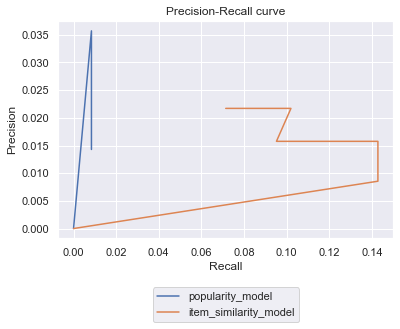

In [66]:
print("Plotting precision recall curves.")

plot_precision_recall(pm_avg_precision_list, pm_avg_recall_list, "popularity_model",
                      ism_avg_precision_list, ism_avg_recall_list, "item_similarity_model")

#### <font color=brown>Observations on Model Evaluation using Precision_Recall Curve:
- <font color=brown>In Poularity Based Model the Recall is approximately constant and not changing much, though the Precision is increasing for few recommendations and then decreasing for few recommendations.The Precision-Recall curve is not optimal though it is realistic as an optimal precision-recall tradeoff cannot be expected</font>
- <font color=brown>In Item Based Similarity Model the Precision is increasing from 0 to 0.009 for all item recommendations and the Recall is increasing for the recommendations made.When the Precision is increasing from 0.009 to 0.015, the recall is constant.The Precision-Recall curve shows that this model is a better optimized than Popularity model and also the non uniform nature of the plot shows that this model is a realistic model</font>

## Building and Evaluating Collaborative Filtering based Recommendation System using Surprise library of scikit

In [67]:
#Take only 10% of the reduced datset data_df as we will encounter a memory error if we take the complete dataset

min_size = round((data_df.shape[0])*50/100)
data_df_min = data_df.iloc[0:min_size,:]
print("Shape of Mimnimized Dataset:\n",data_df_min.shape)

Shape of Mimnimized Dataset:
 (62936, 3)


In [68]:
data_df_min.head()

,userId,productId,ratings
0,A3BY5KCNQZXV5U,0594451647,5.0
1,AT09WGFUM934H,0594481813,3.0
2,A32HSNCNPRUMTR,0970407998,1.0
3,A17HMM1M7T9PJ1,0970407998,4.0
4,A3CLWR1UUZT6TG,0972683275,5.0


In [69]:
#Import the require classes from surprise library

from surprise import Dataset
from surprise import Reader
from surprise import KNNWithMeans
from surprise import accuracy
from surprise.model_selection import train_test_split

In [70]:
#Load the dataset  userID::productId::ratings and transfor to surprise format

reader = Reader(rating_scale=(1, 5))
data_df_collab = Dataset.load_from_df(data_df_min, reader)

In [71]:
data_df_collab.df.shape

(62936, 3)

In [72]:
data_df_collab.df.head()

,userId,productId,ratings
0,A3BY5KCNQZXV5U,0594451647,5.0
1,AT09WGFUM934H,0594481813,3.0
2,A32HSNCNPRUMTR,0970407998,1.0
3,A17HMM1M7T9PJ1,0970407998,4.0
4,A3CLWR1UUZT6TG,0972683275,5.0


In [73]:
data_df_collab.df.tail()

,userId,productId,ratings
62931,A1QOK9LU90ACF7,B003YKG2UU,4.0
62932,A27QXQQOLAMRRR,B003YKG2W8,4.0
62933,AYNAH993VDECT,B003YKG2W8,5.0
62934,A35X2JJI49OBZP,B003YKG2W8,5.0
62935,A1OMXVXXP07F05,B003YKG2W8,5.0


### Split the data randomly into train and test dataset in the ratio 70:30 for building a Collaborative Filtering model using Surprise library.

In [74]:
#Use train_test split method of surprise.model_selection

trainset, testset = train_test_split(data_df_collab, test_size=0.30, random_state=7)

In [75]:
print('Size of trainset: {}\nSize of testset: {}'.format(trainset.n_items, len(testset)))

Size of trainset: 21308
Size of testset: 18881


### Item Similarity Based Collaborative Recommendation System using KNNWithMeans in Surprise library
- Item Similarity based collaborative filtering looks for items that are similar to the items that user has already rated and recommend the most similar items to the users based on item silimarity
- Similarity is based upon co-occurence of purchases of the user

In [76]:
#Creating an instance of Item Similarity based Collaborative Filtering model
#Use user_based true/false to switch between user-based or item-based collaborative filtering

item_sim_model = KNNWithMeans(k=50, min_k=1, sim_options={'name': 'pearson_baseline', 'user_based': False})

In [77]:
#Fit the model on trainset

item_sim_model.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [78]:
#Run the model on testset to get the predictions

item_sim_test_pred = item_sim_model.test(testset)

In [79]:
print('Size of predictions:',len(item_sim_test_pred))

Size of predictions: 18881


In [80]:
item_sim_test_pred[0:5]

[Prediction(uid='A2HMF8ZR67BNZS', iid='B003MVMTDA', r_ui=5.0, est=4.75, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A21INUA35HX4XQ', iid='B00007KDX5', r_ui=5.0, est=3.5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A18S2VGUH9SCV5', iid='B003H3H4K6', r_ui=5.0, est=4.5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A3CKI6VEH0HBMJ', iid='B000NDA5E0', r_ui=5.0, est=4.0, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A1P0JSFW184ZXJ', iid='B001PUQ7PG', r_ui=4.0, est=4.277972027972028, details={'actual_k': 1, 'was_impossible': False})]

In [81]:
item_sim_test_pred_df = pd.DataFrame(([[x.uid,x.iid,x.est] for x in item_sim_test_pred]),
                                     columns=["userId","productId","est_rating"])

In [82]:
item_sim_test_pred_df.head()

,userId,productId,est_rating
0,A2HMF8ZR67BNZS,B003MVMTDA,4.750000
1,A21INUA35HX4XQ,B00007KDX5,3.500000
2,A18S2VGUH9SCV5,B003H3H4K6,4.500000
3,A3CKI6VEH0HBMJ,B000NDA5E0,4.000000
4,A1P0JSFW184ZXJ,B001PUQ7PG,4.277972


### Finding top - K ( K = 5) recommendations using Item Similarity based Collaborative Filtering Model

In [83]:
n_recommendations = 5
top_5_recos = item_sim_test_pred_df.groupby("userId").head(5).reset_index(drop=True)
top_5_recos

,userId,productId,est_rating
0,A2HMF8ZR67BNZS,B003MVMTDA,4.750000
1,A21INUA35HX4XQ,B00007KDX5,3.500000
2,A18S2VGUH9SCV5,B003H3H4K6,4.500000
3,A3CKI6VEH0HBMJ,B000NDA5E0,4.000000
4,A1P0JSFW184ZXJ,B001PUQ7PG,4.277972
5,A20DZX38KRBIT8,B0016OJXGQ,4.000000
6,A3F3B1JPACN215,B003VVH8Y6,4.250000
7,A1RJKTYC03L0JY,B003URJP5Q,4.000000
8,A1JWSDDIH5Z7DV,B000O3N71W,4.253955
9,AKSQNMIKOU01H,B0016XFZNW,4.253955


### Evaluating Item Similarity based Collaborative Filtering Model using RMSE metric

In [84]:
# get RMSE value for the model

print("\nRMSE for Item-Similarity based Model :")
accuracy.rmse(item_sim_test_pred, verbose=True)


RMSE for Item-Similarity based Model :
RMSE: 1.1906


1.1906478558336513

### User Similarity Based Collaborative Recommendation System using KNNWithMeans in Surprise library
- User Similarity based Collaborative Recommendation System looks for users who are similar and recommend the most similar items to the users based o user similarity
- Similarity is based upon similarity in the purchasing behaviour of the users

In [85]:
#Creating an instance of User Similarity based Collaborative Filtering model
#Use user_based true/false to switch between user-based or item-based collaborative filtering

user_sim_model = KNNWithMeans(k=50, min_k=1, sim_options={'name': 'pearson_baseline', 'user_based': True})

In [86]:
#Fit the model on trainset

user_sim_model.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [87]:
#Run the model on testset to get the predictions

user_sim_test_pred = user_sim_model.test(testset)

In [88]:
print('Size of predictions:',len(user_sim_test_pred))

Size of predictions: 18881


In [89]:
user_sim_test_pred[0:5]

[Prediction(uid='A2HMF8ZR67BNZS', iid='B003MVMTDA', r_ui=5.0, est=4.155830753353974, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A21INUA35HX4XQ', iid='B00007KDX5', r_ui=5.0, est=3.6666666666666665, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A18S2VGUH9SCV5', iid='B003H3H4K6', r_ui=5.0, est=3.8771929824561404, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A3CKI6VEH0HBMJ', iid='B000NDA5E0', r_ui=5.0, est=4.72, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A1P0JSFW184ZXJ', iid='B001PUQ7PG', r_ui=4.0, est=4.150621118012422, details={'actual_k': 1, 'was_impossible': False})]

In [90]:
user_sim_test_pred_df = pd.DataFrame(([[x.uid,x.iid,x.est] for x in user_sim_test_pred]),
                                     columns=["userId","productId","est_rating"])

In [91]:
user_sim_test_pred_df.head()

,userId,productId,est_rating
0,A2HMF8ZR67BNZS,B003MVMTDA,4.155831
1,A21INUA35HX4XQ,B00007KDX5,3.666667
2,A18S2VGUH9SCV5,B003H3H4K6,3.877193
3,A3CKI6VEH0HBMJ,B000NDA5E0,4.720000
4,A1P0JSFW184ZXJ,B001PUQ7PG,4.150621


### Finding top - K ( K = 5) recommendations using User Similarity based Collaborative Filtering Model

In [92]:
n_recommendations = 5
top_5_recos = user_sim_test_pred_df.groupby("userId").head(5).reset_index(drop=True)
top_5_recos

,userId,productId,est_rating
0,A2HMF8ZR67BNZS,B003MVMTDA,4.155831
1,A21INUA35HX4XQ,B00007KDX5,3.666667
2,A18S2VGUH9SCV5,B003H3H4K6,3.877193
3,A3CKI6VEH0HBMJ,B000NDA5E0,4.720000
4,A1P0JSFW184ZXJ,B001PUQ7PG,4.150621
5,A20DZX38KRBIT8,B0016OJXGQ,2.629310
6,A3F3B1JPACN215,B003VVH8Y6,4.423077
7,A1RJKTYC03L0JY,B003URJP5Q,4.304348
8,A1JWSDDIH5Z7DV,B000O3N71W,4.253955
9,AKSQNMIKOU01H,B0016XFZNW,4.253955


### Evaluating User Similarity based Collaborative Filtering Model using RMSE metric

In [93]:
# get RMSE value for the model

print("\nRMSE for User-Similarity based Model :")
accuracy.rmse(user_sim_test_pred, verbose=True)


RMSE for User-Similarity based Model :
RMSE: 1.0919


1.091917154255271

#### <font color=brown>Observations on Collaborative Filtering Model and Evaluation using RMSE Metric:</font>
- <font color=brown>Root mean square error computes the mean value of all the differences squared between
the true and the predicted ratings and then proceeds to calculate the square root out of
the result</font>
- <font color=brown>RMSE metric is used when significantly large errors are unwanted</font>
- <font color=brown>The RMSE of Item-based Similarity approach is __1.19__ for a neighborhhod size of 50 using the KNNWithMeans algorithm and Pearson-Correlation Similarity measure</font>
- <font color=brown>The RMSE of User-based Similarity approach is __1.09__ for a neighborhhod size of 50 using the KNNWithMeans algorithm and Pearson-Correlation Similarity measure</font>
- <font color=brown>RMSE of Item Similarity based approach is more compared to User Similarity based approach</font>
- <font color=brown>Item based approach is usually preferred over user-based approach because, User-based approach is usually harder to scale because of the dynamic and sparse nature of users, whereas items usually don’t change much and are not sparse</font>
- <font color=brown>Item-based approach can be computed offline at fewer intervals of time and served without constantly re-training, but User-base approach needs the computations to be made on a more regular basis</font>